# 2. Exploratory Data Analysis (EDA)

An exploratory data analysis (EDA) shows the general demographic distribution of the ECG database. Age and gender of participants can highlight potential bias of the data to take into account when using the trained model. Correlations and associations between selected features are also examine to identify possible redundant information. 

In [129]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.signal
import glob
import os
import seaborn as sns
%matplotlib inline

## 2.1 DataFrame analysis

### Feature distributions: Is there a bias in gender or/and age?
Even if there is a slighlty higher amount of males in the sample population, the gender distributions is not indicate of a strong bias. Instead, younger subjects (around the age of 20) composed most of the sample population, thus making an indication on how this can impact the performance of the model in a different population. Moreover, if we take into account the possibility of the impact of aging in the ECG waveform, then is not a minor issue to consider. 

In [130]:
df_ecg = pd.read_pickle("df_ecg")

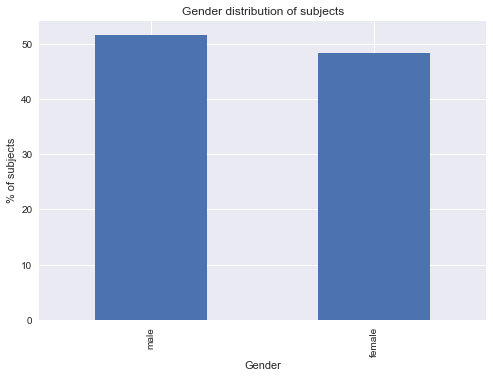

In [131]:
# Gender distribution
plt.style.use("seaborn")

gender_vals = pd.Series(data=df_ecg["Gender"].value_counts())
((gender_vals/df_ecg.shape[0])*100).plot(kind='bar')
plt.title("Gender distribution of subjects")
plt.xlabel("Gender")
plt.ylabel("% of subjects");

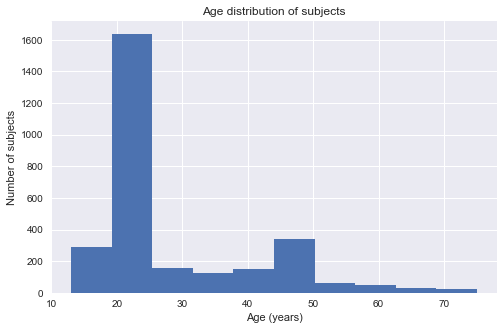

In [132]:
# Age distribution
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df_ecg["Age"]);
ax.set(title="Age distribution of subjects",
      xlabel="Age (years)",
      ylabel="Number of subjects");

In [133]:
# Age Category-Gender analysis
df_ecg['age_category'] = df_ecg['Age'].apply(lambda x: 'Child' if x <= 18 else ('Young Adult' if x <= 40 else ('Adult' if x <= 65 else 'Senior')))
df_ecg = df_ecg.join(pd.get_dummies(df_ecg['Gender']))

In [134]:
df_ver = df_ecg.groupby(by=['age_category']).sum()
female = df_ver.female.values
male = df_ver.male.values
index = ['Child', 'Young Adult', 'Adult', 'Senior']
df_bar = pd.DataFrame({'female': female,
                       'male': male}, index=index)

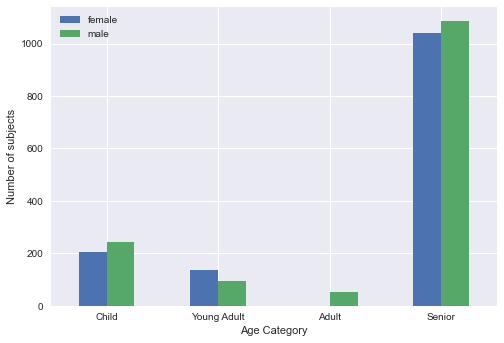

In [135]:
ax = df_bar.plot.bar(rot=0)
ax.set(title="",
      xlabel="Age Category",
      ylabel="Number of subjects");

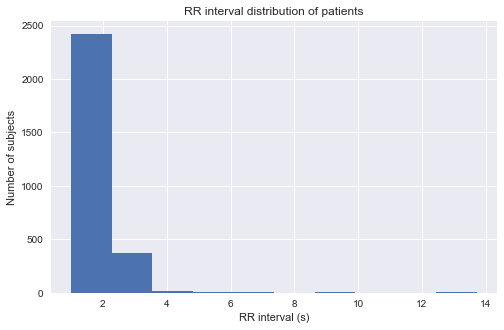

In [136]:
# RR interval distribution
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df_ecg["RR"]);
ax.set(title="RR interval distribution of patients",
      xlabel="RR interval (s)",
      ylabel="Number of subjects");

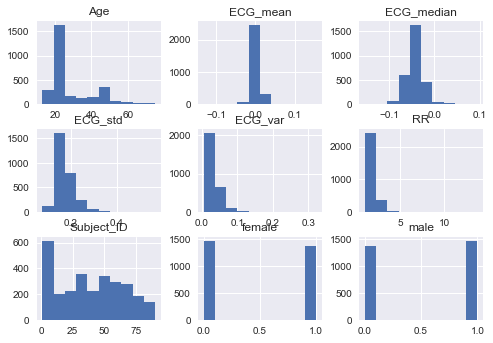

In [137]:
df_ecg.hist();

The following queries are not very enlightening since it seems there is not a clear association between demographic and calculated ECG features.

In [138]:
df_ecg.groupby(["Gender"]).mean()["Age"].sort_values()

Gender
female    26.281996
male      31.271003
Name: Age, dtype: float64

In [139]:
df_ecg.groupby(["Age"]).mean()["RR"].sort_values()

Age
27    1.414231
51    1.419217
58    1.423704
49    1.547803
19    1.552456
22    1.621304
28    1.639825
45    1.670613
75    1.680522
32    1.730326
23    1.742360
59    1.744381
36    1.749311
25    1.760200
20    1.769429
34    1.774381
44    1.790245
21    1.799863
13    1.809524
39    1.816418
40    1.827805
17    1.830235
46    1.831245
48    1.895617
16    1.899987
68    1.984214
55    2.012162
24    2.024041
31    2.053246
Name: RR, dtype: float64

In [140]:
df_ecg.groupby(["Gender"]).mean()["RR"].sort_values()

Gender
male      1.723649
female    1.822028
Name: RR, dtype: float64

In [141]:
df_ecg.groupby(["Age"]).mean()["ECG_mean"].sort_values()

Age
75   -0.000671
59   -0.000134
19    0.000903
28    0.001183
31    0.001747
24    0.001858
39    0.001970
58    0.002449
34    0.002528
16    0.002592
13    0.002677
27    0.002699
49    0.002725
68    0.002843
46    0.003327
55    0.003513
48    0.003520
22    0.003594
44    0.003745
25    0.003750
23    0.004390
32    0.004542
21    0.004758
36    0.005291
17    0.005588
40    0.005726
45    0.005817
20    0.007466
51    0.010850
Name: ECG_mean, dtype: float64

In [142]:
df_ecg.groupby(["Gender"]).mean()["ECG_mean"].sort_values()

Gender
male      0.003383
female    0.004386
Name: ECG_mean, dtype: float64

The heatmap shows only a strong (and clearly expected) correlation between standar deviation and variance, and a less strong one between median and mean, variance and standar deviation. This could indicate that there is redundancy among the calculated features, and thus, the model could suffer for the lack of additional trends, patterns or general information to perform classification.

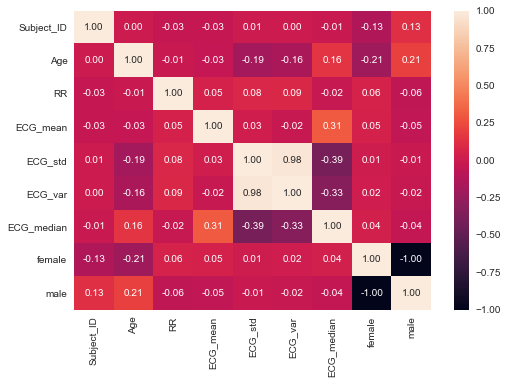

In [143]:
sns.heatmap(df_ecg.corr(), annot=True, fmt=".2f");

## 2.2 Conclusions

The sample population shows a more or less balance gender distribution but a bias towards younger subjects, which could impact the model's performance in a different database.
It seems that calculated features could contain redundant information, presenting an additional difficulty for the model to recognize a broader set of subjects. 